In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, accuracy_score, recall_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn import tree
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from matplotlib import colors


In [3]:
column_names = ['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']
df = pd.read_csv("breast-cancer-data.data",sep=',')
df.columns = column_names
df =df.drop(['ID'],axis=1)
df.head()
X = df.drop('Diagnosis',axis=1).copy()
y = df['Diagnosis'].copy()
y = y.apply(lambda x: 1 if x == 'M' else 0)
#
# X_encoded = pd.get_dummies(X,columns=['sex','cp','fbs','restecg','exang','slope','thal']).astype(float)
# X_encoded.head()

In [4]:
from sklearn.preprocessing import StandardScaler

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [73]:
from sklearn.linear_model import LinearRegression, LogisticRegression

#my classifier
clf = LogisticRegression()
clf.fit(X_train_scaled,y_train)

LogisticRegression()

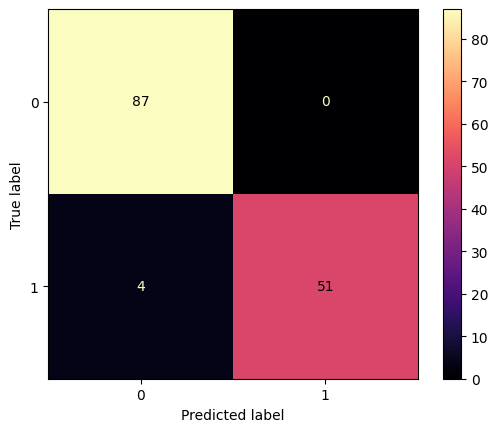

Precision: 1.0000
Accuracy: 0.9718
Sensitivity (Recall): 0.9273


In [74]:
from matplotlib import pyplot as plt
def plot_confusion_mat(ml_model,x_test1,y_test1):
    predictions = ml_model.predict(x_test1)
    cm = confusion_matrix(y_test1, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='magma')
    plt.savefig("images/cf.png")
    plt.show()

def print_metrics(ml_model,x_test1,y_test1):
    predictions = ml_model.predict(x_test1)

    precision = precision_score(y_test1, predictions)
    accuracy = accuracy_score(y_test1, predictions)
    sensitivity = recall_score(y_test1, predictions)

    print(f'Precision: {precision:.4f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Sensitivity (Recall): {sensitivity:.4f}')

plot_confusion_mat(clf,X_test_scaled,y_test)
print_metrics(clf,X_test_scaled,y_test)

In [75]:
clf_linear = LinearRegression()
clf_linear.fit(X_train_scaled,y_train)
linear_reg = clf_linear.predict(X_test_scaled)
logistic_reg = clf.predict(X_test_scaled)
analysed_data = pd.DataFrame({
    'Linear-reg': linear_reg,
    'Logistic-reg': logistic_reg,
    'Real-values': y_test,
})
analysed_data.head(100)

,Linear-reg,Logistic-reg,Real-values
218,1.018858,1,1
79,0.159695,0,0
104,0.797392,1,1
208,0.280245,0,0
543,0.006753,0,0
...,...,...,...
77,1.023222,1,1
411,-0.349595,0,0
181,0.729518,1,1
238,1.256750,1,1


In [79]:
from scipy.stats import norm

coefficients = clf.coef_.copy()
std_errors = np.sqrt(np.diag(np.linalg.inv(np.dot(X.T, X))))

# Calculate z-values
z_values = coefficients / std_errors

# Calculate p-values
p_values = 2 * (1 - norm.cdf(np.abs(z_values)))
isGood = np.where(p_values[0] > .05,'false','true')
coef_and_p_values = pd.DataFrame({
    "Coefficients":coefficients[0],
    "p-values":p_values[0],
    "is_good":isGood
})
print(coef_and_p_values)

    Coefficients      p-values is_good
0       0.701077  3.413359e-01   false
1       0.396365  0.000000e+00    true
2       0.648642  1.703111e-09    true
3       0.654526  0.000000e+00    true
4       0.315819  9.706128e-01   false
5      -0.319162  9.504593e-01   false
6       0.617023  8.890178e-01   false
7       0.817254  9.220031e-01   false
8       0.105681  9.729485e-01   false
9      -0.609762  9.707811e-01   false
10      1.001116  4.462939e-01   false
11     -0.276063  7.693189e-02   false
12      0.651140  1.800102e-04    true
13      0.865462  0.000000e+00    true
14      0.338187  9.903853e-01   false
15     -0.615763  9.457269e-01   false
16      0.098523  9.857276e-01   false
17      0.292481  9.899087e-01   false
18     -0.513368  9.645479e-01   false
19     -0.569943  9.904535e-01   false
20      0.957833  9.198411e-05    true
21      1.471670  0.000000e+00    true
22      0.774206  0.000000e+00    true
23      0.899207  0.000000e+00    true
24      0.918997  8.79254

In [78]:
coefficients[:,np.where(isGood=='false')] =0
print(coefficients)

[[0.         0.39636473 0.64864243 0.65452613 0.         0.
  0.         0.         0.         0.         0.         0.
  0.65113996 0.86546157 0.         0.         0.         0.
  0.         0.         0.95783255 1.47167014 0.77420631 0.89920667
  0.         0.         0.         0.         0.         0.        ]]
